In [55]:
from utils.fig2py import *

### Data

In [56]:
fig_file_loc = '../MATLAB/Figs/scatter_plot_height_weight'
fname = fig_file_loc.split('/')[-1]

In [57]:
plot_data = fig2py(fig_file_loc)

### Set plot style

In [58]:
import matplotlib.pyplot as plt

# Now, apply your custom style sheet
plt.style.use('utils/style_file/publication.mplstyle')

### Choose color scheme

In Matplotlib, colormaps are categorized into three types:

1. **Sequential Colormaps**: Used for representing ordered data varying in magnitude. Examples include 'viridis', 'plasma', 'inferno', and 'magma'.
    
2. **Diverging Colormaps**: Ideal for data with a central neutral point, diverging to different extremes. Examples include 'coolwarm', 'seismic', and 'PiYG'.
    
3. **Qualitative Colormaps**: Best for categorical data where each color represents a different category. Examples are 'tab10', 'tab20', 'Pastel1', and 'Set3'.

In [59]:
# from cycler import cycler
# import numpy as np
# import matplotlib.ticker as ticker

# # Example: Generate colors from the 'magma' colormap
# num_colors = 1
# colors = plt.cm.magma(np.linspace(0, 1, num_colors))

# # Update rcParams with generated color cycle
# plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

### Plot and enhance

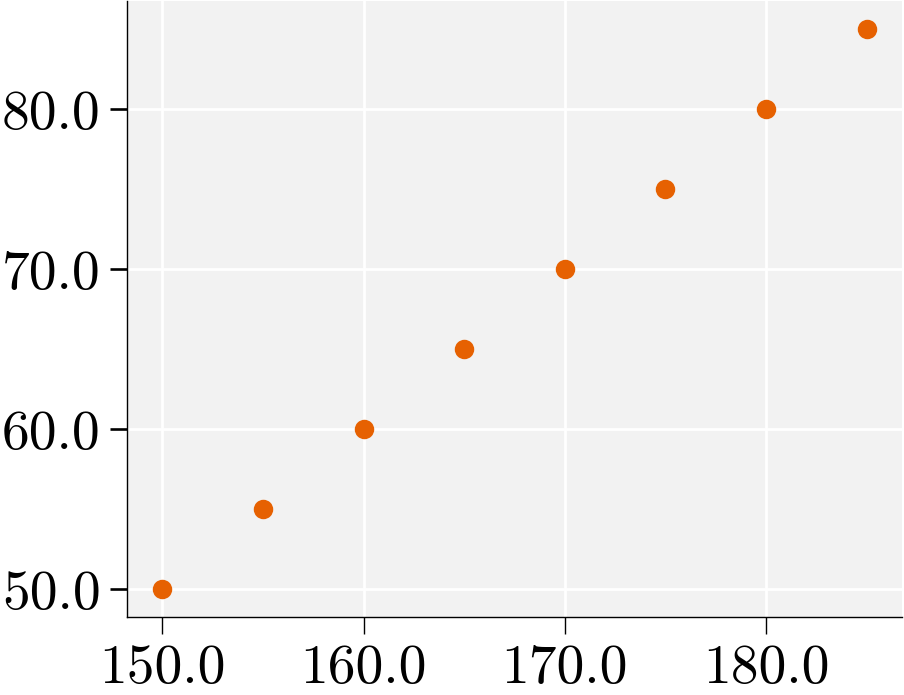

In [60]:
# Plot data
fig, ax = plt.subplots(figsize=(5,4))

for i in range(len(plot_data)):
    ax.scatter(plot_data[i]['XData'][0],plot_data[i]['YData'][0])
    # ax.hist(plot_data[i]['Data'][0],11)

# Label axis
# ax.set_xlabel("$t$")
# ax.set_ylabel("$y(t)$")

# Automatically adjust the axis limits to be tight around the data
ax.autoscale(axis='both', tight=True)

# Add legend
# plt.legend(['$y_1$','$y_2$','$y_3$'])


# Set the format for tick labels
import matplotlib.ticker as ticker
format_str = '%.1f'  # Two decimal places; adjust as needed
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter(format_str))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(format_str))


# Display the figure
plt.margins(0.05)
plt.savefig('Examples/'+fname+'.pdf')
plt.show()
